In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
def generate_y(x: np.ndarray):
    return x[:,0] * 1 + x[:,1] * 2 + x[:,2] * 3 + x[:,3] * 4 + x[:,4] * 5

In [119]:
def relu(x: np.ndarray):
    return np.maximum(0,x)

In [120]:
def d_relu(x: np.ndarray):
    return x > 0

In [121]:
def mse_loss(y: np.ndarray, label: np.ndarray):
    error = 0
    for i in range(len(y)):
        error += (y[i,0] - label[i,0])**2
    return error

In [122]:
def d_mse_loss(y: np.ndarray, label: np.ndarray):
    return 2*(y - label)

In [143]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [148]:
class Layer:
    def __init__(self,data_size, feature_number, neuron_number, linear: bool, lr: float, final: bool):
        self.input = np.random.rand(data_size,feature_number)
        self.weight = np.random.rand(feature_number,neuron_number)
        self.output = np.random.rand(data_size,1)
        self.linear = linear
        self.lr = lr
        self.final = final

    def forward(self, input: np.ndarray):
        self.input = input 
        if self.linear == True:
            self.output = np.dot(input, self.weight) 
        else:
            self.output = relu(np.dot(input,self.weight)) 
        self.z = np.dot(input, self.weight) 

    def backward(self, input: np.ndarray, lr: float, d_loss: np.ndarray):
        if self.final == True: # 
            self.backgradient = d_loss
            return np.dot(self.backgradient, self.weight.T) 
        else:
            self.backgradient = np.multiply(d_relu(self.z),d_loss) 
            return np.dot(self.backgradient, self.weight.T) 

    def update(self, lr: float):
        if self.final == True:
            gradient = np.dot(self.input.T, self.backgradient) 
            self.weight -= lr * gradient
        else:
            gradient = np.dot(self.input.T, self.backgradient) 
            self.weight -= lr * gradient

In [155]:
class NeuralNet:
    def __init__(self, train_X: np.ndarray, train_y: np.ndarray, neuron_number, lr: float) -> None:
        self.train_X = train_X
        self.train_y = train_y
        self.output = np.zeros(train_y.shape)
        self.layer1 = Layer(len(train_X),len(train_X[0]), neuron_number, False, lr, False)
        self.layer2 = Layer(len(train_X),len(train_X[0]), neuron_number, False, lr, False)
        self.outputlayer = Layer(len(train_X),len(train_X[0]), 1, True, lr, True)
        self.lr = lr
        
    def forward(self):
        input = self.train_X
        self.layer1.forward(input)
        self.layer2.forward(self.layer1.output)
        self.outputlayer.forward(self.layer2.output)
        self.output = self.outputlayer.output
        return self.output

    def backward(self, d_loss: np.ndarray):
        d_loss = self.outputlayer.backward(self.layer2.output,self.lr,d_loss)
        d_loss = self.layer2.backward(self.layer1.output, self.lr, d_loss)
        self.layer1.backward(self.train_X,self.lr,d_loss)

    def update(self):
        self.layer1.update(self.lr)
        self.layer2.update(self.lr)
        self.outputlayer.update(self.lr)

    def train(self, times: int):
        loss_list = []
        for i in range(times):
            self.forward()
            loss = mse_loss(self.output, self.train_y)
            loss_list.append(loss)
            d_loss = d_mse_loss(self.output, self.train_y)
            self.backward(d_loss)
            self.update()

            if loss < 0.001:
                plt.plot(loss_list)
                break
        # print(loss_list)
        plt.plot(loss_list)
        
    def predict(self, input: np.array):
        self.layer1.forward(input)
        self.layer2.forward(self.layer1.output)
        self.outputlayer.forward(self.layer2.output)
        return self.outputlayer.output


In [125]:
x = np.random.randint(0,100,size=(100,5))

In [126]:
x

array([[40, 72, 18, 97, 75],
       [71,  9, 55, 46, 71],
       [96, 69, 58, 30, 62],
       [ 4,  2, 50, 55, 26],
       [39, 87, 10, 66,  2],
       [50, 78, 92, 18, 12],
       [35, 49, 11, 94, 24],
       [61, 89, 90, 50, 88],
       [27, 47, 68, 25, 19],
       [50, 37, 65, 83, 35],
       [79,  1,  4, 37,  5],
       [48, 77, 42,  5, 66],
       [75, 29, 93,  1, 72],
       [55, 15, 31, 54, 28],
       [31, 73, 50, 33,  9],
       [33, 89, 22, 23, 92],
       [94, 12, 87, 13, 49],
       [20, 14, 76, 35, 60],
       [50, 65, 59, 91,  3],
       [74, 96, 75, 98, 89],
       [37, 71, 95, 55, 49],
       [69, 88,  3, 98, 92],
       [18, 70, 65, 36, 51],
       [59, 18, 50, 23, 23],
       [72, 54, 80, 53, 34],
       [36, 55, 97, 92,  3],
       [40, 72,  0, 37, 63],
       [45, 33, 90, 80, 29],
       [72, 62,  6, 49, 27],
       [45, 48, 80, 24, 76],
       [12, 50, 17, 26, 11],
       [62, 89, 55,  7, 18],
       [65, 50, 20,  2, 82],
       [23, 87, 92, 89, 20],
       [37, 12

In [127]:
y = x[:,0] * 1 + x[:,1] * 2 + x[:,2] * 3 + x[:,3] * 4 + x[:,4] * 5
y

array([1001,  793,  838,  508,  517,  614,  662, 1149,  520,  826,  266,
        678,  776,  534,  504,  829,  676,  716,  736, 1328,  929, 1106,
        752,  452,  802,  820,  647,  846,  545,  857,  322,  523,  643,
        929,  591,  527,  538,  480,  814,  758,  955, 1091,  903,  472,
        790, 1234,  621,  606,  765,  623, 1269,  642,  719,  977, 1182,
       1030, 1201,  854,  462,  636,  573,  504,  999,  508,  928, 1177,
        593,  628,  624,  543,  667,  788,  652,  751,  913, 1083,  861,
        856,  748,  780,  899, 1054,  835,  626,  490,  990,  418, 1092,
        645,  732,  680, 1133,  646,  946,  468,  554,  842, 1059,  540,
        451])

In [128]:
y = np.resize(y,(100,1))
y

array([[1001],
       [ 793],
       [ 838],
       [ 508],
       [ 517],
       [ 614],
       [ 662],
       [1149],
       [ 520],
       [ 826],
       [ 266],
       [ 678],
       [ 776],
       [ 534],
       [ 504],
       [ 829],
       [ 676],
       [ 716],
       [ 736],
       [1328],
       [ 929],
       [1106],
       [ 752],
       [ 452],
       [ 802],
       [ 820],
       [ 647],
       [ 846],
       [ 545],
       [ 857],
       [ 322],
       [ 523],
       [ 643],
       [ 929],
       [ 591],
       [ 527],
       [ 538],
       [ 480],
       [ 814],
       [ 758],
       [ 955],
       [1091],
       [ 903],
       [ 472],
       [ 790],
       [1234],
       [ 621],
       [ 606],
       [ 765],
       [ 623],
       [1269],
       [ 642],
       [ 719],
       [ 977],
       [1182],
       [1030],
       [1201],
       [ 854],
       [ 462],
       [ 636],
       [ 573],
       [ 504],
       [ 999],
       [ 508],
       [ 928],
       [1177],
       [ 5

In [156]:
net = NeuralNet(x,y,5,0.00000001)

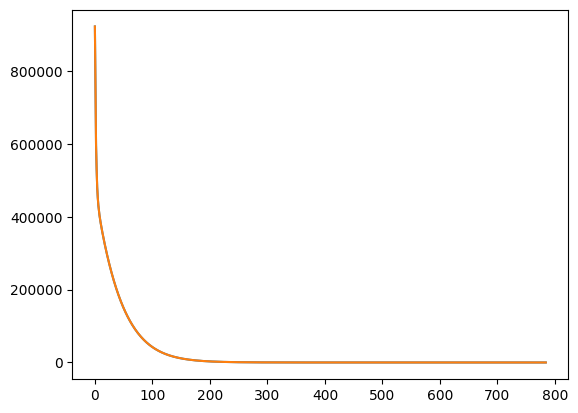

In [157]:
net.train(1000)

In [158]:
test = np.array([[505,404,303,202,101]])

In [159]:
ans = generate_y(test)
ans

array([3535])

In [160]:
net.predict(test)

array([[3535.0133343]])